In [1]:
N = ord("Y") % 3 + 1 # Yuriy

In [2]:
N

3

In [6]:
import csv
import numpy as np

# Функція для завантаження даних із CSV файлу
def load_column_from_csv(file_path, column_name):
    with open(file_path, mode='r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        column_data = [int(row[column_name]) for row in csv_reader if row[column_name]]
        return np.array(column_data)

# Завантаження даних зі стовпця «APC»
file_path = 'russia_losses_equipment.csv'
apc_losses = load_column_from_csv(file_path, 'APC')

# Перевірка результату
print(apc_losses)

[18726 18697 18661 18612 18592 18581 18538 18523 18487 18470 18450 18433
 18404 18395 18355 18332 18287 18254 18229 18199 18175 18111 18072 18053
 18002 17969 17939 17895 17876 17827 17800 17765 17751 17740 17710 17679
 17658 17627 17596 17579 17547 17503 17476 17438 17396 17344 17304 17292
 17252 17222 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955
 16938 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736
 16722 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495
 16480 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323
 16294 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050
 16039 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811
 15779 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566
 15550 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337
 15319 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105
 15096 15076 15036 15020 15002 14980 14947 14935 14

In [12]:
# Знайдіть добові втрати БТР
daily_apc_losses = np.diff(apc_losses) * -1

# Перевірка результатів
print("Добові втрати БТР:", daily_apc_losses)

Добові втрати БТР: [ 29  36  49  20  11  43  15  36  17  20  17  29   9  40  23  45  33  25
  30  24  64  39  19  51  33  30  44  19  49  27  35  14  11  30  31  21
  31  31  17  32  44  27  38  42  52  40  12  40  30  52  38  39  13   3
   6   8  20  40  48  17  13  19   9  19   0   9  21  27  35  26  24  14
  23  18  14  19  17  11  21  32  25  21  26  15   7  12  35  24  17  17
   5  13   9   9   9  29   8  31  17  27   8  42  20  38   8  21  24  11
  26  13  20  17  46  15  19  12   9  36  15  32  24  23  17  11  19  40
  16  18  11  17  17  16  26  19  25  21   9  19  18  15  15  11  35  18
  12  20  18   6  29  26  21  11  32  13  26   9  20  40  16  18  22  33
  12  22  22  33  40  15  17  11  27  27  22  34  35  35  43  14  30  48
  43  42  22  40  32  35  19  14  34  23  27  33  29  21  39  16  20  14
  15  14  12  12   8  23  21  17   8  18  13  31  20  47  19  12  47  45
  24  54  38  73  18  18  29  17  20  20  27  21   9  24  25  28  19  37
  16   9  35  17  24  24  11  17

In [11]:
# Знайдіть 5 найбільших добових втрат БТР
top_5_losses = np.sort(daily_apc_losses)[-5:]

# Перевірка результатів
print("5 найбільших добових втрат БТР:", top_5_losses)

5 найбільших добових втрат БТР: [ 91  96 110 120 190]


In [13]:
from datetime import datetime

# Функція для завантаження дат
def load_column_dates(file):
    with open(file, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        header = next(reader)
        date_idx = header.index('date')
        return [datetime.strptime(row[date_idx], '%Y-%m-%d') for row in reader]

# Завантаження дат
dates = load_column_dates(file_path)

# 5. Визначте, скільки БТР було знищено влітку 2023 року
start_summer = datetime(2023, 6, 1)
end_summer = datetime(2023, 8, 31)

summer_losses = sum(
    loss for date, loss in zip(dates[1:], daily_apc_losses)
    if start_summer <= date <= end_summer
)

print("Кількість знищених БТР влітку 2023 року:", summer_losses)

Кількість знищених БТР влітку 2023 року: 1135


In [14]:
# 6. Знайдіть середнє значення знищених БТР за 100-500 днів війни
average_losses = np.mean(daily_apc_losses[100:500])

print("Середнє значення знищених БТР за 100-500 днів війни:", average_losses)

Середнє значення знищених БТР за 100-500 днів війни: 20.885


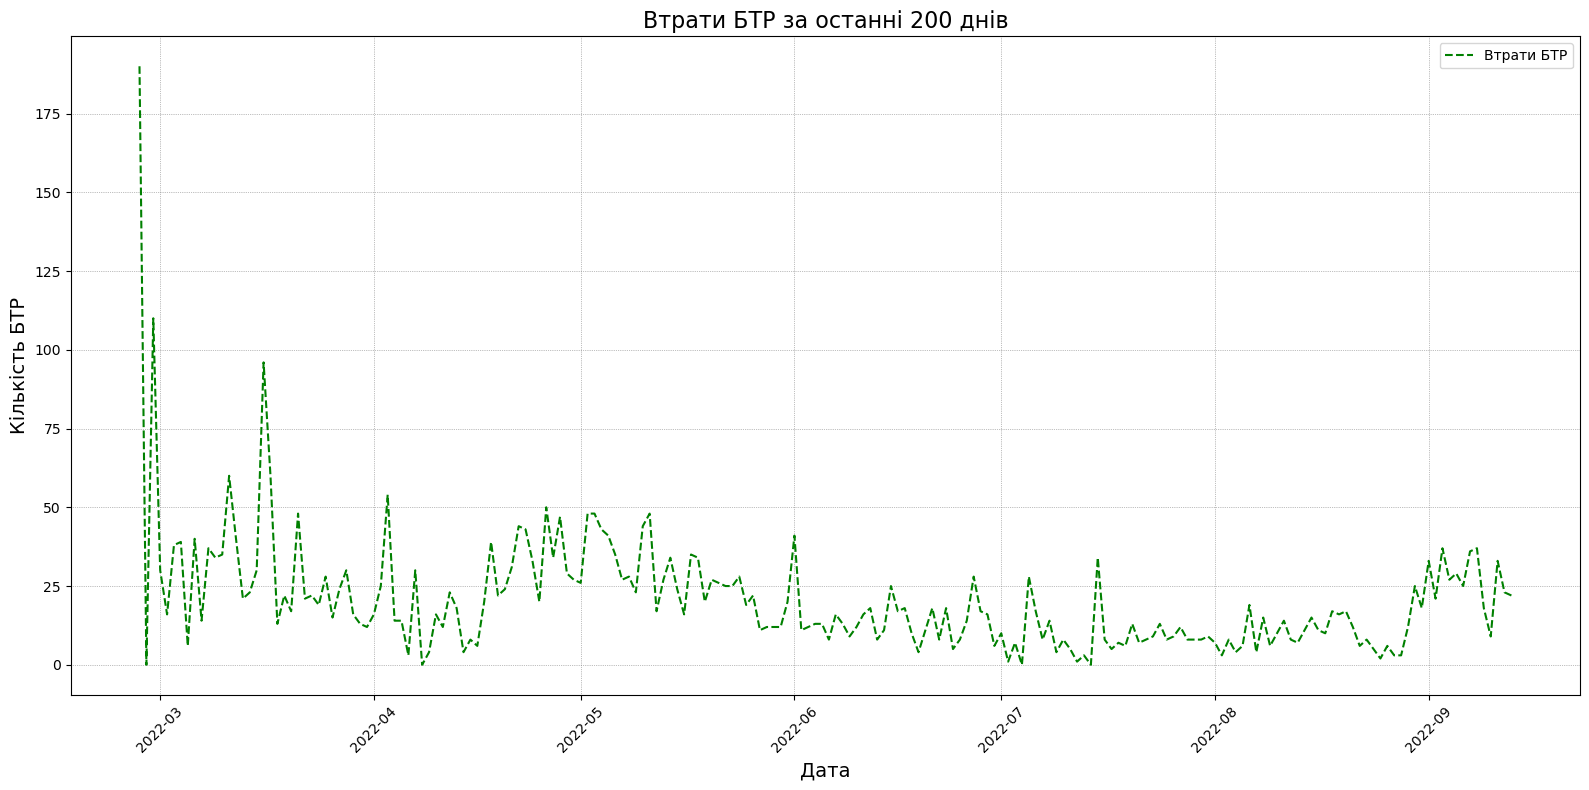

In [17]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Визначення індексів для останніх 200 днів
last_200_indices = np.array(range(len(daily_apc_losses)))[-200:]

# Обмеження індексів до довжини масиву дат і втрат
valid_indices = last_200_indices[last_200_indices < len(dates)]

# Обмежуємо масиви дат і втрат до останніх 200 днів
last_200_losses = daily_apc_losses[valid_indices]
last_200_dates = np.array(dates)[valid_indices]

# Побудова графіка
plt.figure(figsize=(16, 8), dpi=100)

plt.plot(last_200_dates, last_200_losses, linestyle='--', color='g', label='Втрати БТР')

plt.title('Втрати БТР за останні 200 днів', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кількість БТР', fontsize=14)
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('apc_losses_last_200_days.png', format='png')
plt.show()